## No noise

First, we will just experiment with no noise to make sure we construct an accurate simulation of the original results

In [646]:
import numpy as np
import matplotlib.pyplot as plt

d = 6 #Number of columns 
r = 2 #Dimension of U*

#S = np.random.rand(d,r) #Random (true) subspace
S = np.array([[1,1],[1,2],[1,3],[1,4],[1,5],[1,6]]) #Example true space

print("True space \n", S)

True space 
 [[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]]


In [647]:
#Define the binary matrix W

W = np.array([[1,0,0,0],[1,1,0,0],[1,1,1,0],[0,1,1,1],[0,0,1,1], [0,0,0,1]])
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1 0 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]]


In [648]:
#Computing the projections of S onto canonical coordinates

S_proj = np.array(np.hstack(([[S[j,:] for j in range(np.shape(S)[0]) if W_T[i,j] == 1] for i in range(W_T.shape[0])])))

print("Matrix of projections of S onto lower dimensions \n", S_proj)

Matrix of projections of S onto lower dimensions 
 [[1 1 1 2 1 3 1 4]
 [1 2 1 3 1 4 1 5]
 [1 3 1 4 1 5 1 6]]


In [649]:
#Computing the nullspaces of the projections

from scipy.linalg import null_space

A_temp = np.array(np.hstack(([[null_space(S_proj.T[i:i+r, :])[j,:] for j in range(S_proj.T.shape[1])] for i in range(0, S_proj.T.shape[0], r)])))

print("Matrix of basis vectors of the nullspace of projections \n", A_temp)

Matrix of basis vectors of the nullspace of projections 
 [[ 0.40824829  0.40824829  0.40824829  0.40824829]
 [-0.81649658 -0.81649658 -0.81649658 -0.81649658]
 [ 0.40824829  0.40824829  0.40824829  0.40824829]]


In [650]:
#Creating the matrix A whose null space will be the true subspace

A = np.array(W, dtype = float)

for j in range(A.shape[1]):
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
print("Matrix whose kernel will be our guess \n", A)

Matrix whose kernel will be our guess 
 [[ 0.40824829  0.          0.          0.        ]
 [-0.81649658  0.40824829  0.          0.        ]
 [ 0.40824829 -0.81649658  0.40824829  0.        ]
 [ 0.          0.40824829 -0.81649658  0.40824829]
 [ 0.          0.          0.40824829 -0.81649658]
 [ 0.          0.          0.          0.40824829]]


In [651]:
#Finding kernel space of A

S_test = null_space(A.T)

print("Basis of guessed space \n", S_test)

Basis of guessed space 
 [[-0.67399868  0.26369547]
 [-0.44105223  0.31735   ]
 [-0.20810578  0.37100453]
 [ 0.02484067  0.42465907]
 [ 0.25778712  0.4783136 ]
 [ 0.49073357  0.53196813]]


In [652]:
# Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(S_test,np.dot(np.linalg.inv(np.dot(S_test.T,S_test)), S_test.T))

P_true = np.dot(S,np.dot(np.linalg.inv(np.dot(S.T,S)), S.T))

error = np.linalg.norm(P_true - P_test, 'fro') 

print ("True projection", P_true)
print ("Guessed projection", P_test)

print ("Error", error)

True projection [[ 0.52380952  0.38095238  0.23809524  0.0952381  -0.04761905 -0.19047619]
 [ 0.38095238  0.2952381   0.20952381  0.12380952  0.03809524 -0.04761905]
 [ 0.23809524  0.20952381  0.18095238  0.15238095  0.12380952  0.0952381 ]
 [ 0.0952381   0.12380952  0.15238095  0.18095238  0.20952381  0.23809524]
 [-0.04761905  0.03809524  0.12380952  0.20952381  0.2952381   0.38095238]
 [-0.19047619 -0.04761905  0.0952381   0.23809524  0.38095238  0.52380952]]
Guessed projection [[ 0.52380952  0.38095238  0.23809524  0.0952381  -0.04761905 -0.19047619]
 [ 0.38095238  0.2952381   0.20952381  0.12380952  0.03809524 -0.04761905]
 [ 0.23809524  0.20952381  0.18095238  0.15238095  0.12380952  0.0952381 ]
 [ 0.0952381   0.12380952  0.15238095  0.18095238  0.20952381  0.23809524]
 [-0.04761905  0.03809524  0.12380952  0.20952381  0.2952381   0.38095238]
 [-0.19047619 -0.04761905  0.0952381   0.23809524  0.38095238  0.52380952]]
Error 1.4094155855848922e-15


## With noise 

Now we will perform the same experiment, but we will add noise into the mix and see how the noise translates through every step.

In [666]:
d = 5 #Number of columns 
r = 2 #Dimension of U*


#S = np.random.rand(d,r) #Random (true) subspace
S = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space

print("True space \n", S)

True space 
 [[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]


In [667]:
#Define the binary matrix W

W = np.array([[1,0,0],[1,1,0],[1,1,1],[0,1,1],[0,0,1]])
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 1]
 [0 0 1]]


In [668]:
# Computing the projections of S onto canonical coordinates

# No noise Version

S_proj = np.array(np.hstack(([[S[j,:] for j in range(S.shape[0]) if W_T[i,j] == 1] for i in range(W_T.shape[0])])))

# Creating the noisy versions

mu = 0 # mean
sigma = 1 # standard deviation
lam = 1e-2 # noise level

#Adding noise from a Gaussian distribution


S_proj_noise = S_proj + np.random.normal(mu, sigma, (S_proj.shape[0], S_proj.shape[1]))*lam


print("Projections of S onto lower dimensions w/o noise \n", S_proj)
print("Projections of S onto lower dimensions w/ noise \n", S_proj_noise)

Projections of S onto lower dimensions w/o noise 
 [[1 1 1 2 1 3]
 [1 2 1 3 1 4]
 [1 3 1 4 1 5]]
Projections of S onto lower dimensions w/ noise 
 [[1.00398708 0.99781969 1.02071165 2.01516944 0.97917608 3.01020831]
 [1.00210205 1.98483804 1.01446824 3.01824805 1.00000215 3.9869046 ]
 [0.98859566 2.9956005  1.0005558  4.01458364 1.00887519 4.99136208]]


In [669]:
# Computing the nullspaces of the projections

# No noise version

A_temp = np.array(np.hstack(([[null_space(S_proj.T[i:i+r, :])[j,:] for j in range(S_proj.T.shape[1])] for i in range(0, S_proj.T.shape[0], r)])))


# Noisy version

A_temp_noise = np.array(np.hstack(([[null_space(S_proj_noise.T[i:i+r, :])[j,:] for j in range(S_proj_noise.T.shape[1])] for i in range(0, S_proj_noise.T.shape[0], r)])))




print("Basis vectors of the nullspace of projections w/o noise \n", A_temp)
print("Basis vectors of the nullspace of projections w/ noise \n", A_temp_noise)

Basis vectors of the nullspace of projections w/o noise 
 [[ 0.40824829  0.40824829  0.40824829]
 [-0.81649658 -0.81649658 -0.81649658]
 [ 0.40824829  0.40824829  0.40824829]]
Basis vectors of the nullspace of projections w/ noise 
 [[ 0.4191928   0.41244793  0.42652827]
 [-0.81488525 -0.81547688 -0.81447008]
 [ 0.40029917  0.40605931  0.39333463]]


In [670]:
A_temp-A_temp_noise

array([[-0.01094451, -0.00419964, -0.01827998],
       [-0.00161133, -0.0010197 , -0.00202651],
       [ 0.00794912,  0.00218898,  0.01491366]])

In [671]:
#Creating the matrix A whose null space will be the true subspace

# No noise version

A = np.array(W, dtype = float) 

for j in range(A.shape[1]): 
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
            
# Noisy version
            
A_noise = np.array(W, dtype = float) 

for j in range(A_noise.shape[1]):
    c = 0
    for i in range(A_noise.shape[0]):
        if A_noise[i,j] == 1:
            A_noise[i,j] = A_temp_noise[c, j]
            c+=1       

            
print("Matrix whose kernel will be our guess w/o noise \n", A)
print("Matrix whose kernel will be our guess w/ noise \n", A_noise)

Matrix whose kernel will be our guess w/o noise 
 [[ 0.40824829  0.          0.        ]
 [-0.81649658  0.40824829  0.        ]
 [ 0.40824829 -0.81649658  0.40824829]
 [ 0.          0.40824829 -0.81649658]
 [ 0.          0.          0.40824829]]
Matrix whose kernel will be our guess w/ noise 
 [[ 0.4191928   0.          0.        ]
 [-0.81488525  0.41244793  0.        ]
 [ 0.40029917 -0.81547688  0.42652827]
 [ 0.          0.40605931 -0.81447008]
 [ 0.          0.          0.39333463]]


In [672]:
A - A_noise

array([[-0.01094451,  0.        ,  0.        ],
       [-0.00161133, -0.00419964,  0.        ],
       [ 0.00794912, -0.0010197 , -0.01827998],
       [ 0.        ,  0.00218898, -0.00202651],
       [ 0.        ,  0.        ,  0.01491366]])

In [673]:
np.linalg.norm(A-A_noise, 'fro')

0.02774377955361677

In [674]:
#Finding kernel space of A

S_test = null_space(A.T) # No noise
S_test_noise = null_space(A_noise.T) # With noise

print("Basis of guessed space w/o noise \n", S_test)
print("Basis of guessed space w/ noise \n", S_test_noise)

Basis of guessed space w/o noise 
 [[-0.76550168  0.11835195]
 [-0.48243863  0.25933177]
 [-0.19937558  0.4003116 ]
 [ 0.08368747  0.54129143]
 [ 0.36675051  0.68227125]]
Basis of guessed space w/ noise 
 [[-0.75221076  0.1129334 ]
 [-0.49259096  0.25314692]
 [-0.21504859  0.39706509]
 [ 0.06846529  0.54028432]
 [ 0.3749663   0.68818228]]


In [675]:
S_test - S_test_noise

array([[-0.01329092,  0.00541855],
       [ 0.01015233,  0.00618485],
       [ 0.01567301,  0.00324651],
       [ 0.01522218,  0.00100711],
       [-0.00821579, -0.00591103]])

In [676]:
np.linalg.norm(S_test - S_test_noise, 'fro')

0.030637930656314587

In [677]:
# Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(S_test,np.dot(np.linalg.inv(np.dot(S_test.T,S_test)), S_test.T))
P_test_noise = np.dot(S_test_noise,np.dot(np.linalg.inv(np.dot(S_test_noise.T,S_test_noise)), S_test_noise.T))
P_true = np.dot(S,np.dot(np.linalg.inv(np.dot(S.T,S)), S.T))

error = np.linalg.norm(P_true - P_test, 'fro') 
error_noise = np.linalg.norm(P_true - P_test_noise, 'fro') 

print ("True projection", P_true)
print ("Guessed projection w/o noise", P_test)
print ("Guessed projection w/ noise", P_test_noise)

print ("Error w/o noise", error)
print ("Error w/ noise", error_noise)

True projection [[ 6.00000000e-01  4.00000000e-01  2.00000000e-01  1.66533454e-16
  -2.00000000e-01]
 [ 4.00000000e-01  3.00000000e-01  2.00000000e-01  1.00000000e-01
   1.66533454e-16]
 [ 2.00000000e-01  2.00000000e-01  2.00000000e-01  2.00000000e-01
   2.00000000e-01]
 [ 2.22044605e-16  1.00000000e-01  2.00000000e-01  3.00000000e-01
   4.00000000e-01]
 [-2.00000000e-01  1.66533454e-16  2.00000000e-01  4.00000000e-01
   6.00000000e-01]]
Guessed projection w/o noise [[ 6.00000000e-01  4.00000000e-01  2.00000000e-01 -3.01938410e-18
  -2.00000000e-01]
 [ 4.00000000e-01  3.00000000e-01  2.00000000e-01  1.00000000e-01
   3.55672956e-17]
 [ 2.00000000e-01  2.00000000e-01  2.00000000e-01  2.00000000e-01
   2.00000000e-01]
 [ 1.37860621e-17  1.00000000e-01  2.00000000e-01  3.00000000e-01
   4.00000000e-01]
 [-2.00000000e-01  5.32047842e-17  2.00000000e-01  4.00000000e-01
   6.00000000e-01]]
Guessed projection w/ noise [[ 0.57857498  0.39912096  0.20660377  0.00951582 -0.20433492]
 [ 0.3991209

## Experiments

In [749]:
def Errors(d_, r_, U_, W_, lam_, mu):

    # Computing the projections of S onto canonical coordinates

    # No noise Version

    U_proj = np.array(np.hstack(([[U_[j,:] for j in range(U_.shape[0]) if W_.T[i,j] == 1] for i in range(W_.T.shape[0])])))


    # Creating the noisy versions
    
    rows_proj = U_proj.shape[0]
    cols_proj = U_proj.shape[1]

    #mu = 0 # mean
    sigma = 1 # standard deviation

    #Adding noise from a Gaussian distribution to projection (Option 1)
    
    U_proj_noise = U_proj + np.random.normal(mu, sigma, (rows_proj,cols_proj))*lam_


    # Computing the nullspaces of the projections

    # No noise version

    A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r_, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r_)])))


    # Noisy version

    A_temp_noise = np.array(np.hstack(([[null_space(U_proj_noise.T[i:i+r_, :])[j,:] for j in range(U_proj_noise.T.shape[1])] for i in range(0, U_proj_noise.T.shape[0], r_)])))

    
    #Adding noise from a Gaussian distribution to projection (Option 2)
    A_temp_noise = A_temp + np.random.normal(mu, sigma, (A_temp.shape[0],A_temp.shape[1]))*lam_
     
    
    #Creating the matrix A whose null space will be the true subspace

    # No noise version

    A_ = np.array(W_, dtype = float) 

    for j in range(A_.shape[1]):
        c = 0
        for i in range(A_.shape[0]):
            if A_[i,j] == 1:
                A_[i,j] = A_temp[c, j]
                c+=1

    # Noisy version

    Anoise_ = np.array(W_, dtype = float) 

    for j in range(Anoise_.shape[1]):
        c = 0
        for i in range(Anoise_.shape[0]):
            if Anoise_[i,j] == 1:
                Anoise_[i,j] = A_temp_noise[c, j]
                c+=1       

    error_A = np.linalg.norm(A_-Anoise_, 'fro')
    
    Proj_A = np.dot(A_,np.dot(np.linalg.inv(np.dot(A_.T,A_)), A_.T))
    Proj_Anoise = np.dot(Anoise_,np.dot(np.linalg.inv(np.dot(Anoise_.T,Anoise_)), Anoise_.T))
    error_nullSpace = np.linalg.norm(Proj_A - Proj_Anoise, 'fro') 
    
    #Finding kernel space of A

    U_test = null_space(A_.T) # No noise
    U_test_noise = null_space(Anoise_.T) # With noise

    
    error_U_test = np.linalg.norm(U_test - U_test_noise, 'fro')
    
    # Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
    # We test this by looking at the projection matrices 
    # Error estimated with the ||Proj_true - Proj_test||_F, the frobenius norm of the difference in Projection matrices

    Proj_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))
    Proj_test_noise = np.dot(U_test_noise,np.dot(np.linalg.inv(np.dot(U_test_noise.T,U_test_noise)), U_test_noise.T))
    Proj_true = np.dot(U_,np.dot(np.linalg.inv(np.dot(U_.T,U_)), U_.T))

    error_test = np.linalg.norm(Proj_true - Proj_test, 'fro') 
    error_noise_test = np.linalg.norm(Proj_true - Proj_test_noise, 'fro') 

    return error_A, error_nullSpace, error_U_test, error_test, error_noise_test

In [750]:
d = 10 #Number of columns 
r = 7 #Dimension of U

S = np.random.rand(d,r) #Random (true) subspace
#S = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space

W = np.array([[1,0,0],[1,1,0],[1,1,1],[1,1,1],[1,1,1], [1,1,1], [1,1,1], [1,1,1], [0,1,1], [0,0,1]])

low_b = 1e-8 #Lower bound of noise
upper_b = 1e-2 #Upper bound of noise
num = 10000 # Number of experiments


In [751]:
S, W

(array([[0.84429911, 0.16699578, 0.42152998, 0.30977261, 0.14812896,
         0.58307065, 0.06820132],
        [0.07876216, 0.40795624, 0.51898612, 0.73848632, 0.79923087,
         0.83968952, 0.92699649],
        [0.5909968 , 0.90324355, 0.22274579, 0.0177113 , 0.36606108,
         0.04717704, 0.58032388],
        [0.12638931, 0.56951798, 0.58645846, 0.25808837, 0.51160913,
         0.20954229, 0.96297471],
        [0.19574505, 0.01571108, 0.96110872, 0.34778342, 0.27665403,
         0.03994459, 0.99157473],
        [0.10438919, 0.39392857, 0.15964919, 0.60227823, 0.11892067,
         0.2545232 , 0.95657621],
        [0.8960234 , 0.99702906, 0.42196324, 0.70566199, 0.37683149,
         0.46920093, 0.65999056],
        [0.88185933, 0.88773926, 0.41773308, 0.01849616, 0.42701779,
         0.1665346 , 0.27779528],
        [0.43182179, 0.08957282, 0.69783338, 0.79670804, 0.43658775,
         0.53539081, 0.67284402],
        [0.04809354, 0.98147892, 0.51106386, 0.00318072, 0.82716701,
    

In [752]:
lam_vec = np.random.uniform(low_b,upper_b,num) # Vector that stores different noise values to test
lam_vec = np.sort(lam_vec)

mean_vec = np.linspace(1e-7,10, num) # Vector that stores different mean values to test for the normal distribution (In Errors())

In [753]:
lam_vec

array([3.94307178e-06, 1.15493380e-05, 1.34514459e-05, ...,
       9.99581378e-03, 9.99908865e-03, 9.99923865e-03])

In [754]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_nullSpace = np.empty(num, dtype = float) # Stores error in projection onto A (noiseless vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noise_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess

mean = 0
#lam = 1e-3

c = 0
#for mean in mean_vec:
for lam in lam_vec:
    err_A[c], err_nullSpace[c], err_U_test[c], err_test[c], err_noise_test[c] = Errors(d,r,S,W,lam, mean)
    c+=1


In [756]:
err_A

array([2.26697849e-05, 4.75418312e-05, 6.99311661e-05, ...,
       5.32020185e-02, 4.05934988e-02, 5.01795378e-02])

In [757]:
err_nullSpace

array([5.33072526e-05, 1.16989323e-04, 1.68704530e-04, ...,
       1.22181899e-01, 7.81409566e-02, 1.32296605e-01])

In [758]:
err_U_test

array([5.04301381e-05, 1.05088850e-04, 1.49833265e-04, ...,
       1.02500931e-01, 7.07252042e-02, 1.24497626e-01])

In [759]:
err_test

array([2.20899679e-14, 2.20899679e-14, 2.20899679e-14, ...,
       2.20899679e-14, 2.20899679e-14, 2.20899679e-14])

In [760]:
err_noise_test

array([5.33072526e-05, 1.16989323e-04, 1.68704530e-04, ...,
       1.22181899e-01, 7.81409566e-02, 1.32296605e-01])

In [761]:
x = np.linspace(low_b,upper_b,num)
y = (2*np.sqrt(r))*x

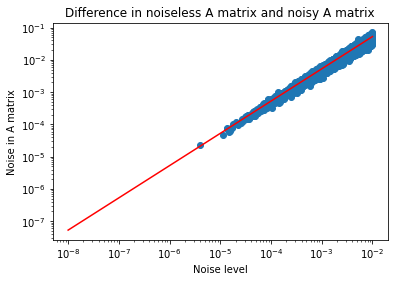

In [762]:
plt.scatter(lam_vec,err_A)
plt.title("Difference in noiseless A matrix and noisy A matrix")
plt.xlabel("Noise level")
plt.ylabel("Noise in A matrix")
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,color = 'red')
plt.show()

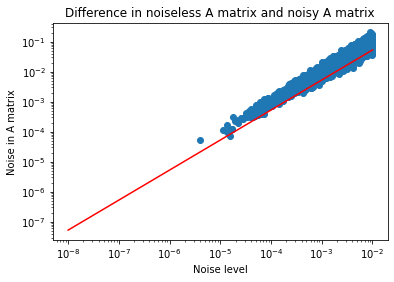

In [763]:
plt.scatter(lam_vec,err_nullSpace)
plt.title("Difference in noiseless A matrix and noisy A matrix")
plt.xlabel("Noise level")
plt.ylabel("Noise in A matrix")
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,color = 'red')
plt.show()

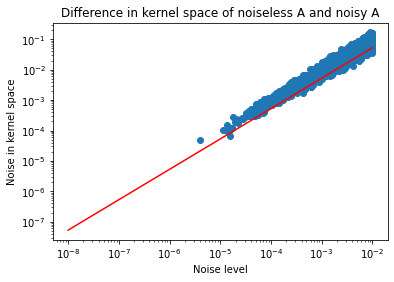

In [764]:
plt.scatter(lam_vec, err_U_test)
plt.title("Difference in kernel space of noiseless A and noisy A")
plt.xlabel("Noise level")
plt.ylabel("Noise in kernel space")
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,color = 'red')
plt.show()

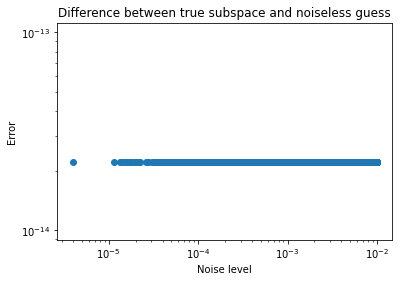

In [765]:
plt.scatter(lam_vec, err_test)
plt.title("Difference between true subspace and noiseless guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.show()

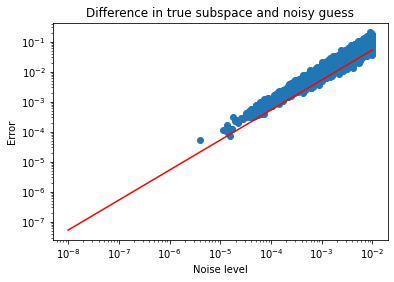

In [766]:
x = np.linspace(low_b,upper_b,num)
y = (2*np.sqrt(r))*x

plt.scatter(lam_vec, err_noise_test)
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,color = 'red')
plt.show()

## Statistical analysis

### Linear regression

In [771]:
from sklearn.linear_model import LinearRegression

lam_vec_reshape = lam_vec.reshape(-1,1)

reg = LinearRegression().fit(lam_vec_reshape,err_noise_test)

lam_vec_test = np.random.uniform(low_b,upper_b,num) # Vector that stores different noise values to test
lam_vec_test = np.sort(lam_vec_test)
lam_vec_test = lam_vec_test.reshape(-1,1)

pred_err = reg.predict(lam_vec_test)

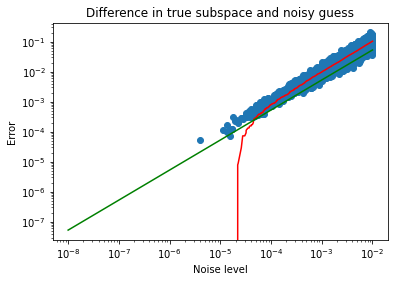

In [772]:
x = np.linspace(low_b,upper_b,num)
y = (2*np.sqrt(r))*x

plt.scatter(lam_vec, err_noise_test)
plt.plot(lam_vec, pred_err, '-', color = 'red')
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,color = 'green')
plt.show()

### PCA

In [798]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

lam_vec_reshape = lam_vec.reshape(-1,1)

pca.fit(lam_vec_reshape, err_nullSpace)

PCA(n_components=1)

In [799]:
pca.components_

array([[-1.]])

In [800]:
pca.explained_variance_

array([8.26228177e-06])